# Ensemble : Bagging

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : 랜덤포레스트


In [7]:
# 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       769
           1       0.68      0.64      0.66       731

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500



## 4.시각화와 변수중요도

### (1) 모델의 내부를 살펴봅시다.

In [11]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1393989448),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=600455840),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1714905881),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1879216553),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=866390270)]

In [12]:
model.estimators_[1]

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=600455840)

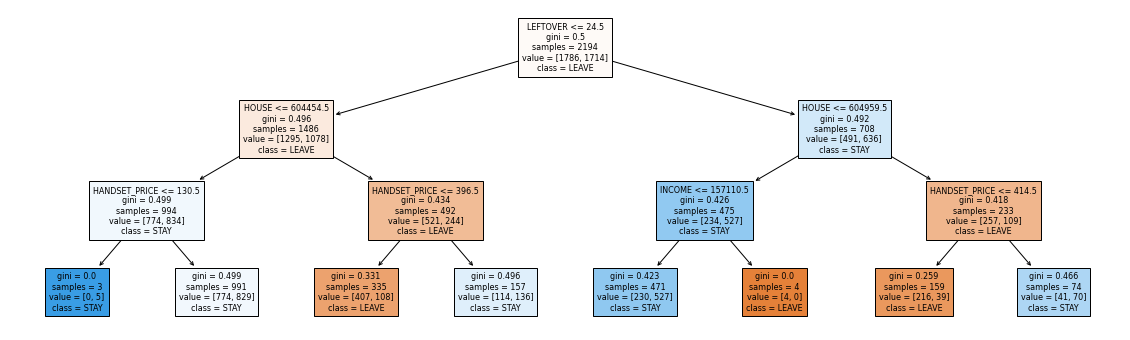

In [13]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(20,6))
plot_tree(model.estimators_[1], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [14]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.09268867 0.07731582 0.06758864 0.36826139 0.12717956
 0.22336903 0.04258186 0.         0.         0.         0.
 0.00054364 0.         0.         0.         0.         0.0004714
 0.         0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [15]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

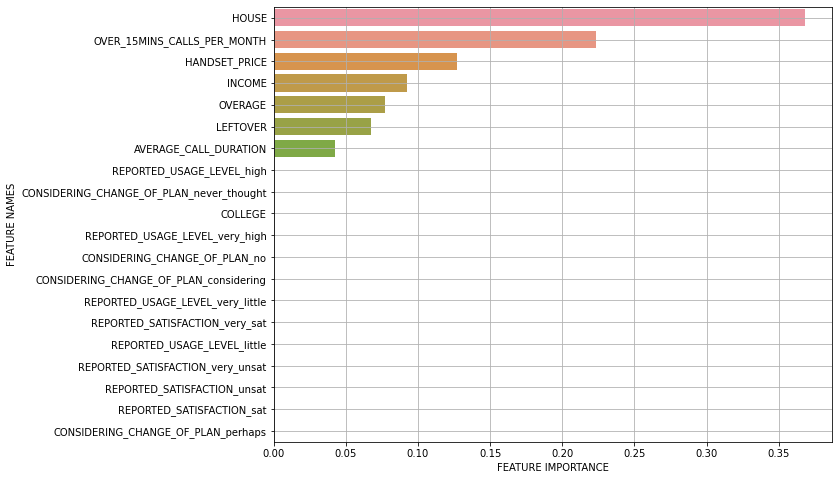

In [16]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습: random forest 튜닝

* grid search를 수행합니다.
    * ① n_estimators 의 갯수를 5 ~ 200까지 5개씩 증가시켜가며 튜닝해 봅시다.
    * ② max_features를 1 ~ feature갯수까지 1씩 증가시켜가며 튜닝해 봅시다.
    * ③ n_estimators, max_features를 동시에 튜닝.

* 모델링 후 cv 평가 결과를 차트로 그려봅시다. 
* 튜닝된 모델로 부터 변수중요도를 뽑아 봅시다.


### (1) n_estimators 튜닝

In [17]:
param = {'n_estimators' : range(5,201,5)}
rn_model_gs = GridSearchCV(model,param,cv=5)

In [18]:
rn_model_gs.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=5),
             param_grid={'n_estimators': range(5, 201, 5)})

In [19]:
rn_model_gs.best_params_

{'n_estimators': 105}

In [20]:
rn_model_gs.best_score_

0.687142857142857

In [21]:
rn_pred_gs =rn_model_gs.predict(x_val)

In [22]:
print(classification_report(y_val, rn_pred_gs))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       769
           1       0.75      0.60      0.67       731

    accuracy                           0.71      1500
   macro avg       0.71      0.70      0.70      1500
weighted avg       0.71      0.71      0.70      1500



In [23]:
reslt = pd.DataFrame(rn_model_gs.cv_results_)

In [24]:
reslt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032322,0.011708,0.025715,0.031744,5,{'n_estimators': 5},0.632857,0.701429,0.621429,0.628571,0.621429,0.641143,0.030458,40
1,0.044366,0.005830,0.006414,0.001860,10,{'n_estimators': 10},0.647143,0.710000,0.664286,0.687143,0.621429,0.666000,0.030751,39
2,0.070016,0.014031,0.007326,0.001880,15,{'n_estimators': 15},0.664286,0.697143,0.662857,0.698571,0.652857,0.675143,0.018965,37
3,0.085188,0.007963,0.008594,0.001762,20,{'n_estimators': 20},0.647143,0.715714,0.670000,0.698571,0.660000,0.678286,0.025240,34
4,0.096912,0.011181,0.010010,0.003562,25,{'n_estimators': 25},0.648571,0.685714,0.674286,0.685714,0.668571,0.672571,0.013714,38


In [25]:
temp = reslt.loc[:, ['param_n_estimators', 'mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,5,0.641143
1,10,0.666000
2,15,0.675143
3,20,0.678286
4,25,0.672571


In [26]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

### (2) max_features 튜닝

In [ ]:
param2 = {'max_features': range(1,x_train.shape[1]+1)}
rn_model_gs2 = GridSearchCV(model, param2,cv=5, verbose = 3)

In [28]:
rn_model_gs2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=5),
             param_grid={'max_features': range(1, 21)})

In [29]:
rn_model_gs2.best_estimator_

RandomForestClassifier(max_depth=3, max_features=20, n_estimators=5)

In [30]:
rn_model_gs2.best_score_

0.6908571428571428

In [31]:
rn_model_gs2.estimator

RandomForestClassifier(max_depth=3, n_estimators=5)

In [32]:
rn_pred_gs2 = rn_model_gs2.predict(x_val)
print(classification_report(y_val, rn_pred_gs2))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73       769
           1       0.74      0.62      0.68       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



* 변수 중요도

In [33]:
print(x_train.columns)
print(rn_model_gs2.best_estimator_.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.1949129  0.32846605 0.08891493 0.34373393 0.0378056
 0.00386224 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00230434 0.
 0.         0.        ]


In [34]:
reslt2 = pd.DataFrame(rn_model_gs2.cv_results_)

In [35]:
reslt2 = reslt2.loc[:,['param_max_features','mean_test_score']]
reslt2.sort_values(by=[1],axis=1,ascending=False).head()

,param_max_features,mean_test_score
0,1,0.603714
1,2,0.623143
2,3,0.630286
3,4,0.652857
4,5,0.673429


In [ ]:
plt.figure(figsize = (12,8))
plt.plot('param_max_features', 'mean_test_score', data = reslt2, marker = 'o')
plt.grid()
plt.show()

,feature_names,feature_importance
0,HOUSE,0.343734
1,OVERAGE,0.328466
2,INCOME,0.194913
3,LEFTOVER,0.088915
4,HANDSET_PRICE,0.037806
5,OVER_15MINS_CALLS_PER_MONTH,0.003862
6,CONSIDERING_CHANGE_OF_PLAN_considering,0.002304
7,COLLEGE,0.000000
8,REPORTED_USAGE_LEVEL_little,0.000000
9,CONSIDERING_CHANGE_OF_PLAN_no,0.000000


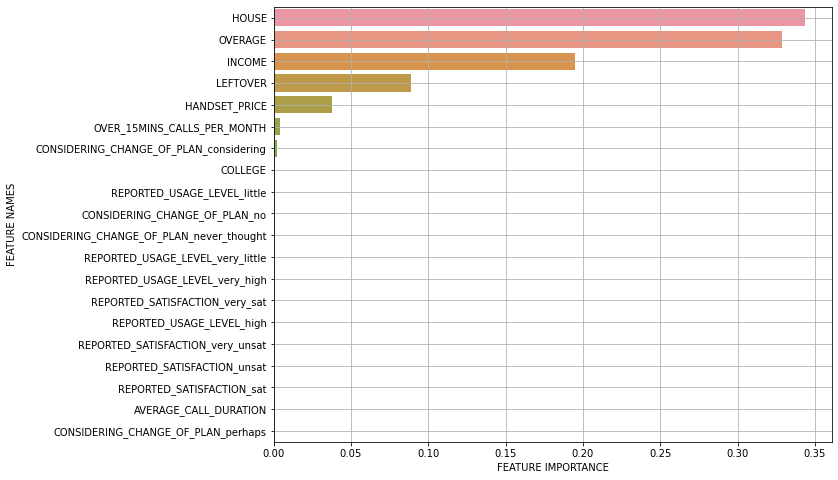

In [36]:
plot_feature_importance(rn_model_gs2.best_estimator_.feature_importances_, x_train.columns)

### (3) n_estimators와 max_features를 한꺼번에 튜닝

In [37]:
param3 = {'n_estimators': range(5,201,5),'max_features': range(1,x_train.shape[1]+1) }
param3

{'n_estimators': range(5, 201, 5), 'max_features': range(1, 21)}

In [38]:
rn_model_gs3 = GridSearchCV(model, param3, cv=5)

In [39]:
rn_model_gs3.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=5),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': range(5, 201, 5)})

In [40]:
rn_model_gs3.best_estimator_

RandomForestClassifier(max_depth=3, max_features=10, n_estimators=35)

In [41]:
rn_model_gs3.estimator

RandomForestClassifier(max_depth=3, n_estimators=5)

In [42]:
reslt3 = pd.DataFrame(rn_model_gs3.cv_results_)

In [43]:
reslt3 = reslt3.loc[:,['param_max_features','param_n_estimators','mean_test_score','std_test_score','rank_test_score']]

In [44]:
reslt3.sort_values(by='mean_test_score',ascending=False)

,param_max_features,param_n_estimators,mean_test_score,std_test_score,rank_test_score
394,10,175,0.693714,0.026351,1
410,11,55,0.693714,0.024472,1
366,10,35,0.693714,0.022671,1
567,15,40,0.693714,0.026551,1
498,13,95,0.693714,0.027039,1
...,...,...,...,...,...
2,1,15,0.629429,0.018151,796
3,1,20,0.624286,0.025185,797
1,1,10,0.616857,0.023095,798
0,1,5,0.608000,0.020296,799


,feature_names,feature_importance
0,HOUSE,0.387238
1,OVERAGE,0.225654
2,OVER_15MINS_CALLS_PER_MONTH,0.127657
3,INCOME,0.086508
4,HANDSET_PRICE,0.072731
5,LEFTOVER,0.070035
6,AVERAGE_CALL_DURATION,0.028465
7,REPORTED_USAGE_LEVEL_little,0.000513
8,CONSIDERING_CHANGE_OF_PLAN_considering,0.000466
9,REPORTED_SATISFACTION_very_sat,0.000422


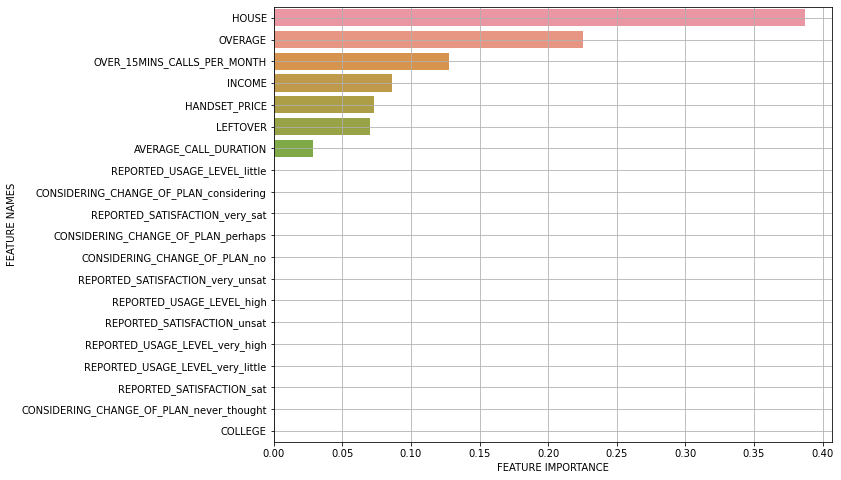

In [45]:
plot_feature_importance(rn_model_gs3.best_estimator_.feature_importances_, x_train.columns)

1.HOUSE
2.OVERAGE
3.OVER_15MINS_CALLS_PER_MONTH
4.LEFTOVER
5.HANDSET_PRICE

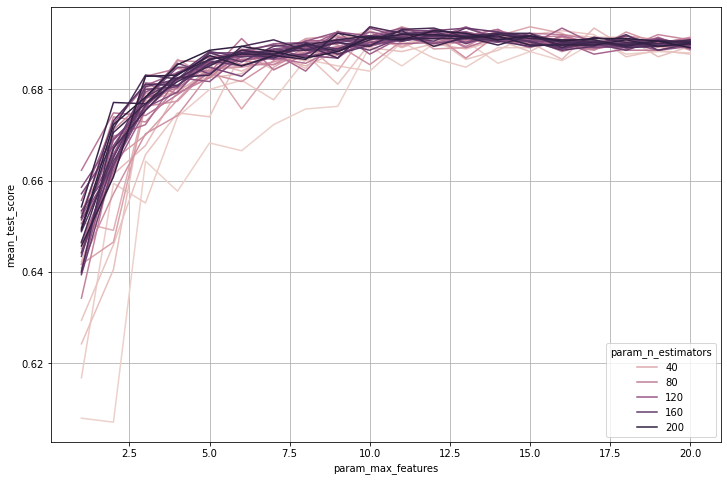

In [48]:
plt.figure(figsize = (12,8))
sns.lineplot('param_max_features', 'mean_test_score', data = reslt3, hue = 'param_n_estimators')
plt.grid()
plt.show()